<a href="https://www.kaggle.com/code/orjiugochukwu/eda-of-covid-19-data-in-nigeria?scriptVersionId=106045351" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Title: Exploratory Data Analysis of Covid-19 Pandemic in Nigeria 
## Author: Ugochukwu Orji
## Date: 19th July, 2022



# Introduction

The need to speedily make decisions that could have far-reaching effects is prompting 
the boom in data analytics which is achieved via exploratory data analysis 
<br> </br> to see trends, patterns and relationships in the data. Nigeria is one of the epicentres of COVID-19 in Africa. The first case of COVID-19 in Nigeria was reported on February 27th, 2020. <br> </br> According to the Nigeria Centre for Disease Control (NCDC), it was also the very first documented case in sub-Saharan Africa; since then, the country has fought hard to control the outbreak. <br> </br> In this project we tell the data story of how the virus has progressed in Nigeria. Our dataset is from the Nigeria Centre for Disease Control (NCDC), it comprises records of Covid-19 cases in all states of Nigeria between **February 28th, 2020, and July 19th, 2022.**

### **Let's get started**

**Importing required Python Packages and Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [2]:
nig_covid_df = pd.read_csv("../input/nigeriacovid19-data19072022/naija_data.csv")
nig_covid_df.head()

,states,confirmed_cases,active_cases,discharged,deaths,Latitude,Longitude
0,Abia,2177,1,2142,34,5.532003,7.486002
1,Adamawa,1203,68,1103,32,10.270341,13.270032
2,Akwa Ibom,4670,40,4586,44,5.007996,7.849999
3,Anambra,2825,46,2760,19,6.210434,7.069997
4,Bauchi,1967,1,1942,24,11.680410,10.190013


# Cleaning the Dataset

**Dropping empty colums**

In [3]:
nig_covid = nig_covid_df.dropna(axis=1)
nig_covid.head()

,states,confirmed_cases,active_cases,discharged,deaths,Latitude,Longitude
0,Abia,2177,1,2142,34,5.532003,7.486002
1,Adamawa,1203,68,1103,32,10.270341,13.270032
2,Akwa Ibom,4670,40,4586,44,5.007996,7.849999
3,Anambra,2825,46,2760,19,6.210434,7.069997
4,Bauchi,1967,1,1942,24,11.680410,10.190013


**Checking datatype for consistency**

In [4]:
nig_covid_df.dtypes

states              object
confirmed_cases      int64
active_cases         int64
discharged           int64
deaths               int64
Latitude           float64
Longitude          float64
dtype: object

**Performing statistical summary on the data**

In [5]:
nig_covid.describe()

,confirmed_cases,active_cases,discharged,deaths,Latitude,Longitude
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,7000.189189,145.351351,6769.864865,84.972973,8.486068,7.291427
std,16911.301062,470.387796,16348.986143,134.608173,2.549189,2.467108
min,5.000000,0.000000,3.000000,2.000000,4.664030,3.350017
25%,1334.000000,2.000000,1293.000000,25.000000,6.340477,5.469940
50%,2648.000000,13.000000,2381.000000,37.000000,7.870410,7.320008
75%,5173.000000,83.000000,4934.000000,89.000000,10.620423,8.520038
max,101683.000000,2852.000000,98062.000000,769.000000,13.060015,13.270032


**Checking the pairwise correlation of all columns in the dataframe**

In [6]:
# excluding Longitude and Latitude
X= nig_covid.loc[:, nig_covid.columns != 'Latitude']
y = X.loc[:,X.columns != 'Longitude']
y.corr()

,confirmed_cases,active_cases,discharged,deaths
confirmed_cases,1.000000,0.929488,0.999946,0.935915
active_cases,0.929488,1.000000,0.925742,0.843379
discharged,0.999946,0.925742,1.000000,0.935606
deaths,0.935915,0.843379,0.935606,1.000000


<AxesSubplot:title={'center':'Heat Map'}>

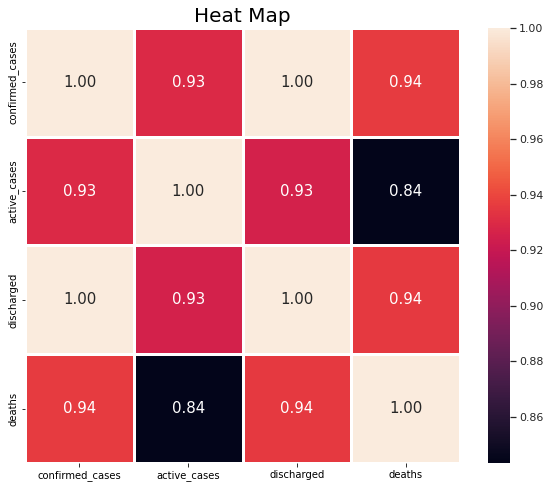

In [7]:

plt.figure(figsize=(10,8))
plt.title('Heat Map', fontsize=20)
sns.set(font_scale=1.0)
sns.heatmap(y.corr(), cbar=True, annot =True, square=True, fmt='.2f',annot_kws={'size':15}, linewidth=3)

# Visualizing different variables in the data

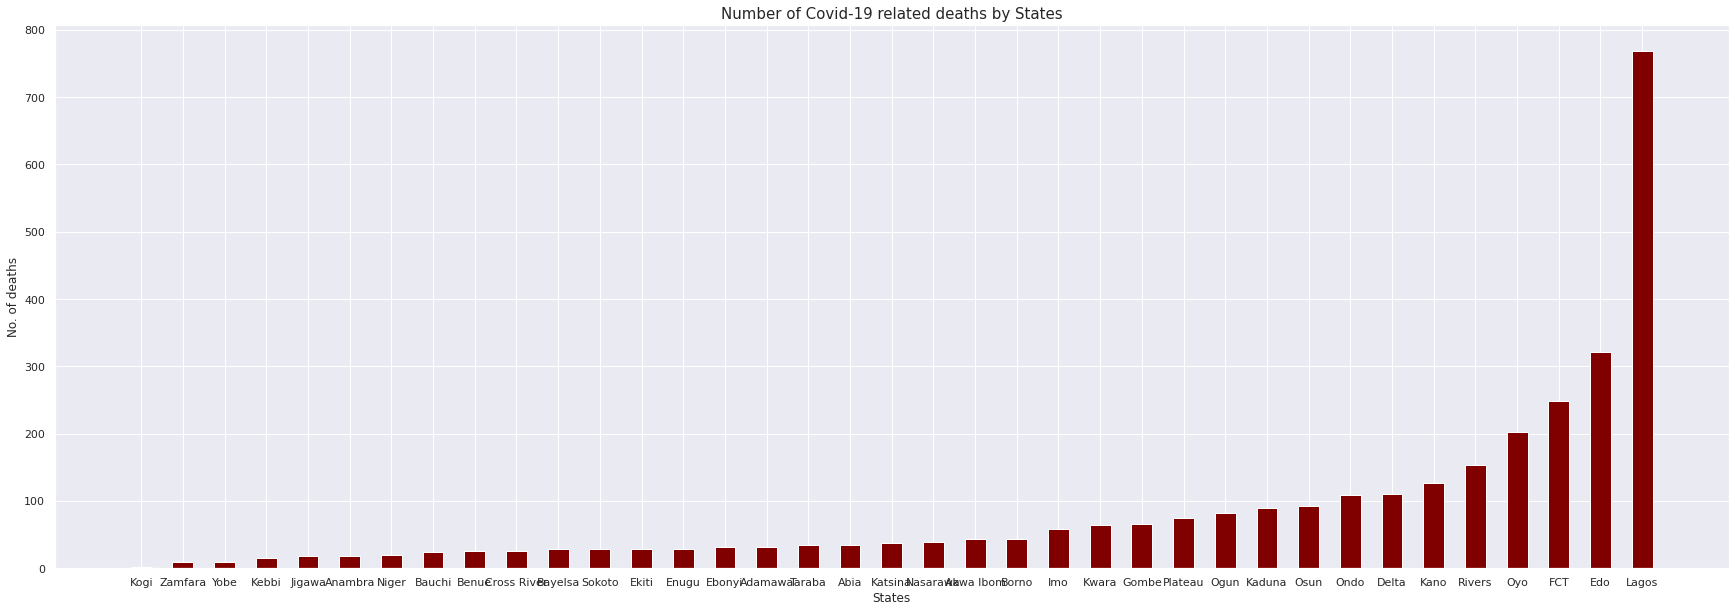

In [8]:
nig_covid = nig_covid.sort_values("deaths")
deaths = nig_covid["deaths"]
states = nig_covid["states"]

  
fig = plt.figure(figsize = (30, 10))
 
# creating the bar plot
plt.bar(states,deaths, color ='maroon',
        width = 0.5)
 
plt.xlabel("States")
plt.ylabel("No. of deaths")
plt.title("Number of Covid-19 related deaths by States", size=15)
plt.show()

<AxesSubplot:title={'center':'Number of covid-19 related deaths by states'}, xlabel='States', ylabel='Deaths'>

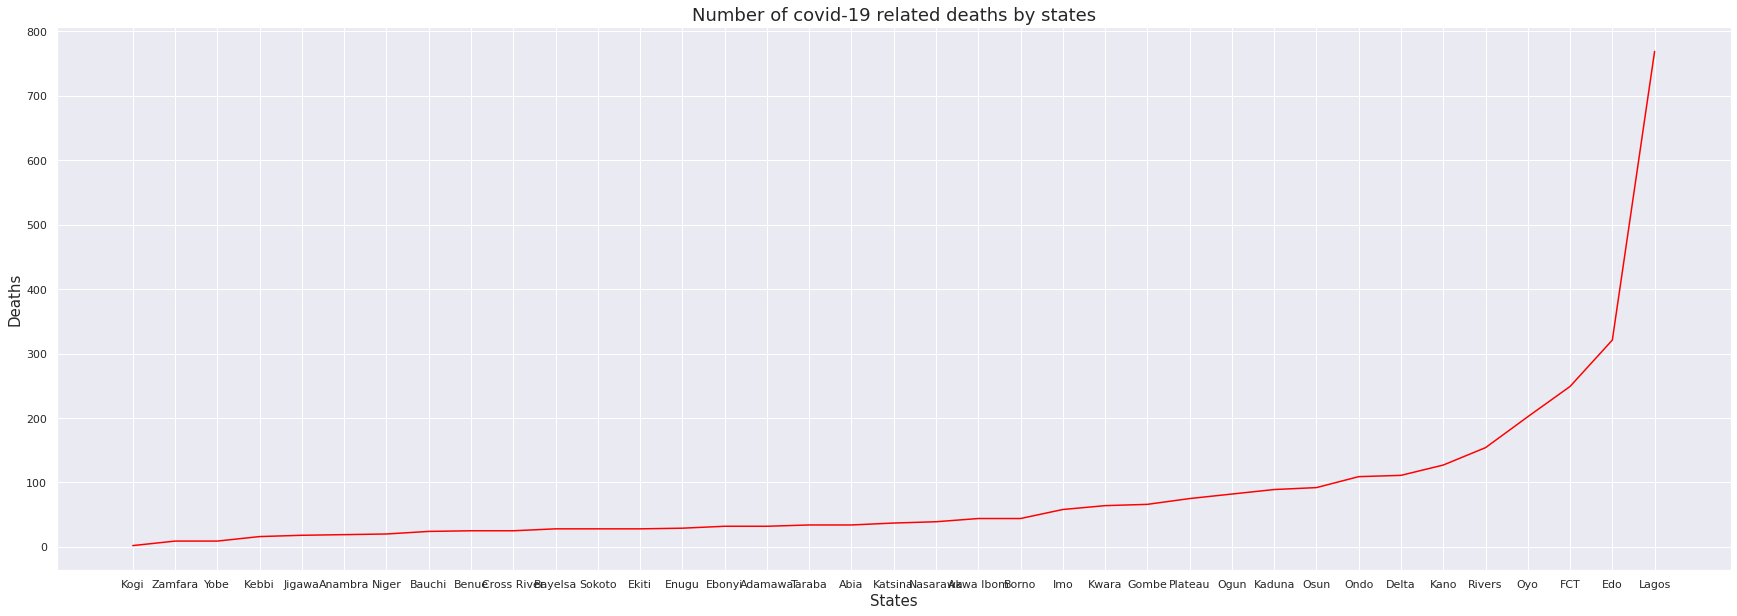

In [9]:

plt.figure(figsize=(30,10))
plt.xlabel("States", size=15)
plt.ylabel("Deaths", size=15)
plt.title("Number of covid-19 related deaths by states", size=18)
sns.lineplot(data=nig_covid, x="states", y="deaths", color="red")

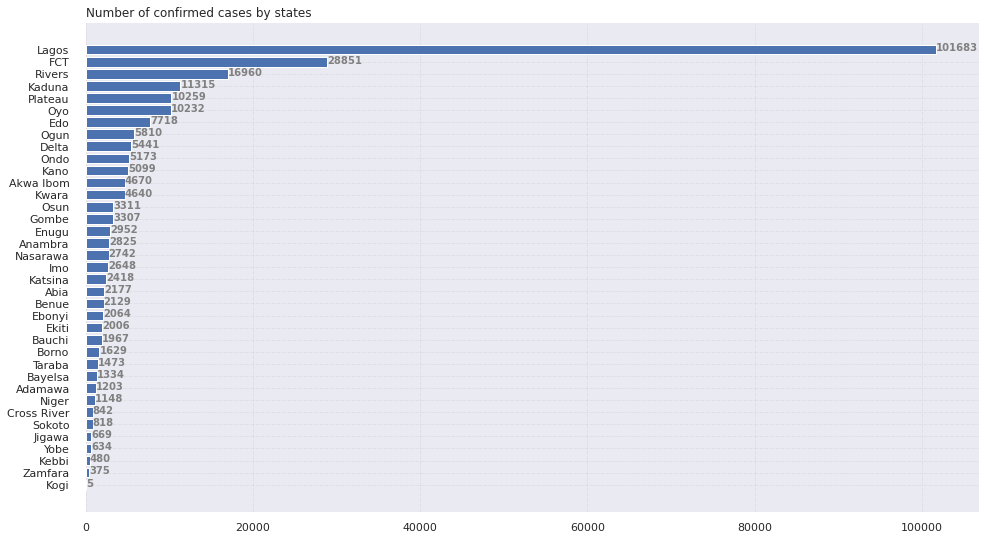

In [10]:
nig_covid = nig_covid.sort_values("confirmed_cases", ascending=False)

states = nig_covid["states"]
confirmed_cases = nig_covid["confirmed_cases"]

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(states, confirmed_cases)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Number of confirmed cases by states',
             loc ='left', )
 
# Add Text watermark
#fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
#         color ='grey', ha ='right', va ='bottom',
  #       alpha = 0.7)
 
# Show Plot
plt.show()

Text(0.5, 1.0, 'Number of active cases by states')

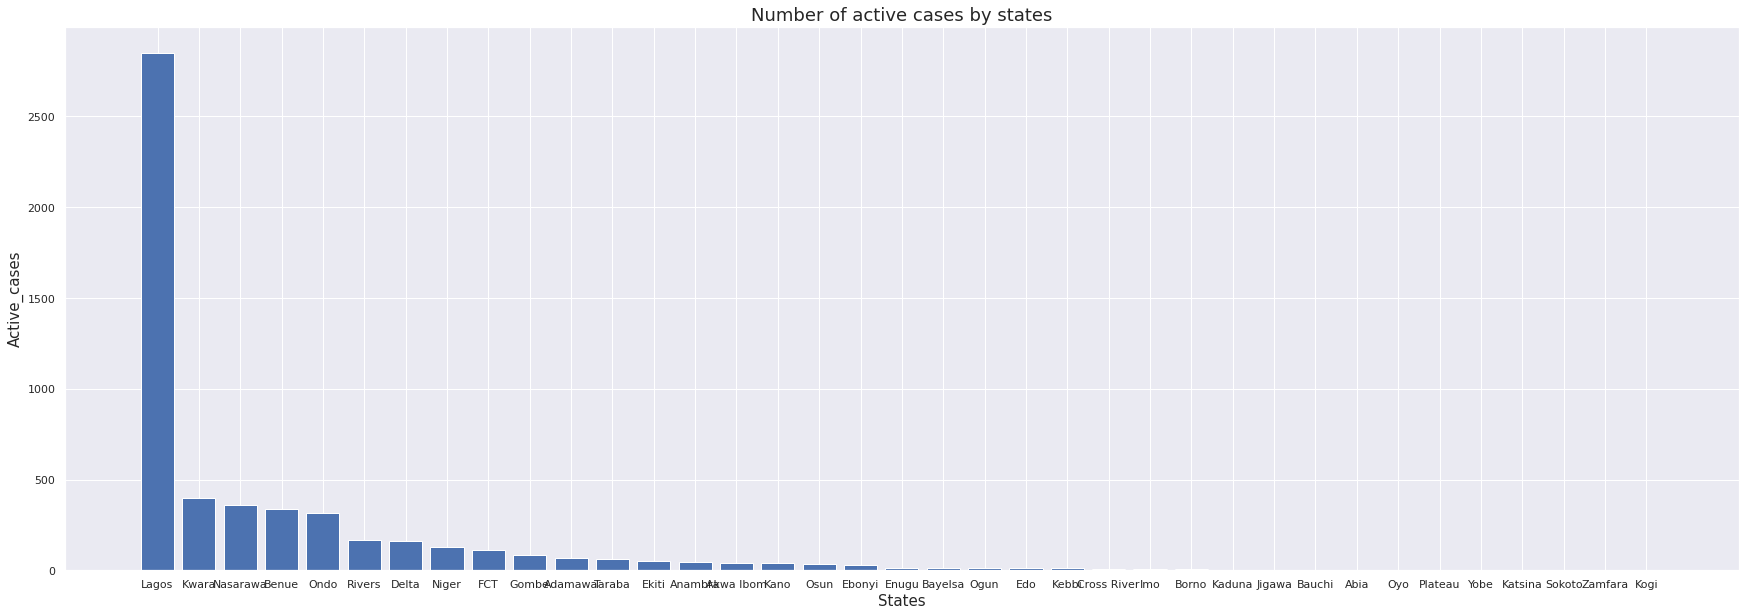

In [11]:
nig_covid = nig_covid.sort_values("active_cases", ascending=False)
plt.figure(figsize=(30,10))
# bar plot with matplotlib
plt.bar('states', 'active_cases',data= nig_covid)
plt.xlabel("States", size=15)
plt.ylabel("Active_cases", size=15)
plt.title("Number of active cases by states", size=18)

In [12]:
fig = px.treemap(nig_covid, path=["states"], values="confirmed_cases", height = 750,
                 title="<b>Total covid-19 Confirmed Cases Breakdown by states in Nigeria</b>",
                 color_discrete_sequence = px.colors.qualitative.Set3)

fig.update_traces(textinfo = "label+text+value")
fig.show()

**Exporting to CSV for Visualization in Tableau**

In [13]:

#nig_covid.to_csv('naija_data.csv')# relative position
#nig_covid.to_csv("C:\\Users\\hp\\Documents\\data related articles\\naija_data.csv")

# To check out the Dashboard in Tableau follow the link: https://tabsoft.co/3u8zety